
# بخش اول
می‌خواهیم یک متن فارسی بنویسیم:
--

می توانیم یک خط مخفی بسازیم.  
% این یک خط مخفی است.نشد که!!  
اینجه می خواهم یک تکه از متن را **بولد** کنم.  
اینجا هم می خواهم یک تکه از متن را *ایتالیک* کنم.  
اینجا هم ~خط می کشم~ روی یک تکه.  
+ مورد اول  
+ مورد دوم  
+ مورد سوم  

1. مورد هشتم  
6. مورد نهم

- [] کیه کیه در میزنه؟  
- [x] منم منم مادرتون  

> این قسمت از متن یک نقل قول قراره باشه. شد.  

[]


In [27]:

import numpy as np
import pandas as pd
import seaborn as sns
import os
import re

In [2]:
root_path = os.getcwd()
data_path = os.path.join(root_path, "datasets/imdb 2017" )

In [3]:
os.listdir(data_path)

['Combinded_raw_file_2017.csv', 'movie_list_2017.csv']

In [4]:
F1_path = os.path.join(data_path , "Combinded_raw_file_2017.csv")
F2_path = os.path.join(data_path , "movie_list_2017.csv")

In [8]:
df1 = pd.read_csv(F1_path)

In [10]:
df1.head(3)

,Unnamed: 0.1,Unnamed: 0,Title,IMDb code,Year,Movie detail,Certificate,Duration,Genre,DWS,...,age_of_voter_distro,gis_of_voter_distro,Poster link,Related movie score,Arithmetic mean Median,Release dates-complete,Akas-complete,Filming locations-complete,Filming dates-complete,Companies
0,0,0,Logan,tt3315342,2017,{'Official Sites': 'Marvel [United States]|Off...,R,2h 17min,"['Action', 'Drama', 'Sci-Fi']","[('Director:', ['James Mangold']), ('Writers:'...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '7.6 720'}, 'US Users...",https://m.media-amazon.com/images/M/MV5BYzc5MT...,"[[[('777894', '8.5')], 'tt4154756'], [[('12638...",\n Arithmetic mean = 8.2\n ...,"{0: {0: 'Germany', 1: 'Taiwan', 2: 'Belgium', ...","{0: {0: '(original title)', 1: 'Argentina', 2:...","['\nJust outside Northern Meadows community, R...","[<li class=""ipl-zebra-list__item"">\n ...","<ul class=""simpleList"">\n<li>\n<a href=""/compa..."
1,1,0,Thor: Ragnarok,tt3501632,2017,{'Official Sites': 'Marvel [United States]|Off...,PG-13,2h 10min,"['Action', 'Adventure', 'Comedy']","[('Director:', ['Taika Waititi']), ('Writers:'...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '7.4 703'}, 'US Users...",https://m.media-amazon.com/images/M/MV5BMjMyND...,"[[[('635287', '7.8')], 'tt3498820'], [[('58316...",\n Arithmetic mean = 8.0\n ...,"{0: {0: 'USA', 1: 'Australia', 2: 'UK', 3: 'Ir...","{0: {0: '(original title)', 1: 'Argentina', 2:...","['\nMount Tamborine, Queensland, Australia\n '...","[<li class=""ipl-zebra-list__item"">\n ...","<ul class=""simpleList"">\n<li>\n<a href=""/compa..."
2,2,0,Guardians of the Galaxy Vol. 2,tt3896198,2017,{'Official Sites': 'Instagram|Marvel [United S...,PG-13,2h 16min,"['Action', 'Adventure', 'Comedy']","[('Director:', ['James Gunn']), ('Writers:', [...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '7.4 698'}, 'US Users...",https://m.media-amazon.com/images/M/MV5BNjM0NT...,"[[[('1013918', '8.0')], 'tt2015381'], [[('5696...",\n Arithmetic mean = 7.7\n ...,"{0: {0: 'Japan', 1: 'USA', 2: 'Australia', 3: ...","{0: {0: '(original title)', 1: 'Argentina', 2:...","['\nCartersville, Georgia, USA\n ', '\nPinewoo...","[<li class=""ipl-zebra-list__item"">\n ...","<ul class=""simpleList"">\n<li>\n<a href=""/compa..."


In [11]:
df1.tail(4)

,Unnamed: 0.1,Unnamed: 0,Title,IMDb code,Year,Movie detail,Certificate,Duration,Genre,DWS,...,age_of_voter_distro,gis_of_voter_distro,Poster link,Related movie score,Arithmetic mean Median,Release dates-complete,Akas-complete,Filming locations-complete,Filming dates-complete,Companies
4228,1567,0,From Hell to the Wild West,tt6086718,2017,"{'Country': 'USA', 'Language': 'English', 'Rel...",NaN,1h 17min,"['Horror', 'Western']","[('Director:', ['Rene Perez']), ('Writer:', ['...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '2.2 19'}, 'US Users'...",https://m.media-amazon.com/images/M/MV5BZDBlYm...,"[[[], 'tt8674464'], [[('159', '2.7')], 'tt1004...",\n Arithmetic mean = 3.2\n ...,"{0: {0: 'USA'}, 1: {0: '26 December 2017'}, 2:...","{0: {0: '(original title)', 1: 'Russia', 2: 'U...","['\nLos Angeles, California, USA\n ']",NaN,"<ul class=""simpleList"">\n<li>\n<a href=""/compa..."
4229,1568,0,Training Day,tt4946972,,"{'Country': 'USA', 'Language': 'English', 'Rel...",NaN,42min,"['Action', 'Crime', 'Drama']","[('Creator:', ['Will Beall']), ('Stars:', ['Bi...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '6.0 68'}, 'US Users'...",https://m.media-amazon.com/images/M/MV5BMjI5OD...,"[[[('5763', '7.1')], 'tt5592230'], [[('3421', ...",\n Arithmetic mean = 6.6\n ...,"{0: {0: 'Canada', 1: 'USA', 2: 'Australia', 3:...","{0: {0: '(original title)', 1: 'Australia', 2:...","['\nLos Angeles, California, USA\n ']",NaN,"<ul class=""simpleList"">\n<li>\n<a href=""/compa..."
4230,1569,0,Viking Siege,tt5555824,2017,"{'Official Sites': 'Company Page', 'Country': ...",NaN,1h 59min,"['Action', 'Adventure']","[('Director:', ['Jack Burton']), ('Writers:', ...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '2.6 15'}, 'US Users'...",https://m.media-amazon.com/images/M/MV5BZmNlNj...,"[[[('530', '2.3')], 'tt5555554'], [[('564', '4...",\n Arithmetic mean = 4.3\n ...,"{0: {0: 'UK', 1: 'USA', 2: 'Turkey'}, 1: {0: '...","{0: {0: '(original title)', 1: 'Turkey (Turkis...",NaN,NaN,"<ul class=""simpleList"">\n<li>\n<a href=""/compa..."
4231,1570,0,Vidago Palace,tt5073948,,"{'Country': 'Portugal|Spain', 'Language': 'Por...",NaN,NaN,"['Drama', 'History']","[('Creator:', ['Henrique Oliveira']), ('Stars:...",...,"{'Unnamed: 0': {0: 'All', 1: 'Males', 2: 'Fema...","{'Top 1000 Voters': {0: '6.6 5'}, 'US Users':...",https://m.media-amazon.com/images/M/MV5BMjQ3NG...,"[[[('538', '8.6')], 'tt7170638'], [[('82', '8....",\n Arithmetic mean = 7.5\n ...,"{0: {0: 'Portugal', 1: 'Portugal'}, 1: {0: '30...",NaN,"['\nVidago, Vila Real, Portugal\n ', '\nVidago...",NaN,"<ul class=""simpleList"">\n<li>\n<a href=""/compa..."


In [15]:
df1.keys() # callable function

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Title', 'IMDb code', 'Year',
       'Movie detail', 'Certificate', 'Duration', 'Genre', 'DWS', 'Stars',
       'Popularity', 'Popularity up or down', 'Matascore', 'Metafavor',
       'User review', 'Critic review', 'Related movie', 'abstract', 'keywords',
       'all keywords', 'PG', 'PG detail', 'PG Country', 'vote_distro',
       'age_of_voter_distro', 'gis_of_voter_distro', 'Poster link',
       'Related movie score', 'Arithmetic mean Median',
       'Release dates-complete', 'Akas-complete', 'Filming locations-complete',
       'Filming dates-complete', 'Companies'],
      dtype='object')

In [16]:
df1.columns #method

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Title', 'IMDb code', 'Year',
       'Movie detail', 'Certificate', 'Duration', 'Genre', 'DWS', 'Stars',
       'Popularity', 'Popularity up or down', 'Matascore', 'Metafavor',
       'User review', 'Critic review', 'Related movie', 'abstract', 'keywords',
       'all keywords', 'PG', 'PG detail', 'PG Country', 'vote_distro',
       'age_of_voter_distro', 'gis_of_voter_distro', 'Poster link',
       'Related movie score', 'Arithmetic mean Median',
       'Release dates-complete', 'Akas-complete', 'Filming locations-complete',
       'Filming dates-complete', 'Companies'],
      dtype='object')

In [18]:
df1.describe()

,Unnamed: 0.1,Unnamed: 0,Popularity,Matascore,keywords
count,4232.000000,4232.0,508.000000,783.000000,0.0
mean,936.095227,0.0,467.261811,60.278416,NaN
std,634.486456,0.0,299.424748,16.748222,NaN
min,0.000000,0.0,4.000000,12.000000,NaN
25%,353.000000,0.0,210.000000,49.000000,NaN
50%,882.000000,0.0,396.000000,63.000000,NaN
75%,1411.000000,0.0,769.000000,73.000000,NaN
max,2309.000000,0.0,992.000000,94.000000,NaN


In [24]:
df1_prime = df1[['Title', 'IMDb code', 'Year','Movie detail', 'Certificate', 'Duration', 'Genre','DWS']]

In [26]:
df1_prime.isna().astype('int8').sum() # np.nan cells

Title              0
IMDb code          0
Year               0
Movie detail       0
Certificate     3088
Duration         127
Genre              0
DWS                6
dtype: int64

In [22]:
df1_clean = pd.DataFrame()

<Axes: >

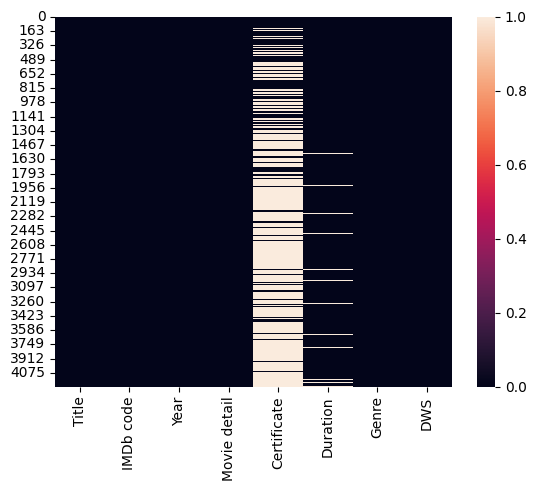

In [28]:
sns.heatmap(df1_prime.isna().astype('int8'))

In [35]:
df1_clean['Title'] = df1['Title']
df1_clean['IMDb code'] = df1['IMDb code']
df1_clean['Year'] = df1['Year']

"""'Movie detail', 'Certificate', 'Duration', 'Genre', 'DWS', 'Stars',
       'Popularity', 'Popularity up or down', 'Matascore', 'Metafavor',
       'User review', 'Critic review', 'Related movie', 'abstract', 'keywords',
       'all keywords', 'PG', 'PG detail', 'PG Country', 'vote_distro',
       'age_of_voter_distro', 'gis_of_voter_distro', 'Poster link',
       'Related movie score', 'Arithmetic mean Median',
       'Release dates-complete', 'Akas-complete', 'Filming locations-complete',
       'Filming dates-complete', 'Companies'"""

"'Movie detail', 'Certificate', 'Duration', 'Genre', 'DWS', 'Stars',\n       'Popularity', 'Popularity up or down', 'Matascore', 'Metafavor',\n       'User review', 'Critic review', 'Related movie', 'abstract', 'keywords',\n       'all keywords', 'PG', 'PG detail', 'PG Country', 'vote_distro',\n       'age_of_voter_distro', 'gis_of_voter_distro', 'Poster link',\n       'Related movie score', 'Arithmetic mean Median',\n       'Release dates-complete', 'Akas-complete', 'Filming locations-complete',\n       'Filming dates-complete', 'Companies'"

In [38]:
type(df1['Movie detail'].loc[0])

str

In [39]:
eval(df1['Movie detail'].loc[0])  

{'Official Sites': 'Marvel [United States]|Official Facebook|',
 'Country': 'USA',
 'Language': 'English|Spanish',
 'Release Date': ' 3 March 2017 (USA)',
 'Also Known As': ' Logan',
 'Filming Locations': 'Just outside Northern Meadows community, Rio Rancho, New Mexico, USA',
 'Budget': '$97,000,000            (estimated)',
 'Opening Weekend USA': ' $88,411,916,5 March 2017',
 'Gross USA': ' $226,277,068',
 'Cumulative Worldwide Gross': ' $619,021,436',
 'Production Co': ' Twentieth Century Fox, Marvel Entertainment, TSG Entertainment',
 'Runtime': '137 min|122 min            (Mainland China Censored Version)',
 'Sound Mix': 'DTS(DTS: X)| Dolby Atmos| Dolby Digital| Dolby Surround 7.1| SDDS',
 'Color': 'Color',
 'Aspect Ratio': ' 2.39 : 1'}

In [59]:
def movie_detail(mstr):
    try:  # is this a Dictionary?
        mstr = eval(mstr)
        try:
            C = mstr['Country']
        except:
            C = np.nan
        try:
            L = mstr['Language']
        except:
            L = np.nan
        try:
            AKA = mstr['Also Known As']
        except:
            AKA = np.nan
        try:
            B = mstr['Budget']
        except:
            B = np.nan
        try:
            R = mstr['Runtime']
        except:
            R = np.nan
        return C, L, AKA, B, R # oon C lamasab kuchik bud 1 saat sare karam gozasht
    except:
        return np.nan, np.nan, np.nan, np.nan, np.nan

In [62]:
movie_detail(df1['Movie detail'].loc[0])

('USA',
 'English|Spanish',
 ' Logan',
 '$97,000,000            (estimated)',
 '137 min|122 min            (Mainland China Censored Version)')

In [63]:
df1['Movie detail'].apply(movie_detail) # its return series (5 element in one tuple)

0       (USA, English|Spanish,  Logan, $97,000,000    ...
1       (USA, English,  Thor 3, $180,000,000          ...
2       (USA, English,  Guardians of the Galaxy 2, $20...
3       (USA, English,  Star Wars: The Last Jedi, $317...
4       (USA|China|Hong Kong, English|German|Dutch|Fre...
                              ...                        
4227    (Belgium, Dutch|Italian|French,  Charlie and H...
4228    (USA, English,  Из ада на Дикий Запад, nan, 77...
4229           (USA, English,  Training Day, nan, 42 min)
4230    (UK, English,  Attack of the Tree Beasts, nan,...
4231    (Portugal|Spain, Portuguese|Gallegan, nan, nan...
Name: Movie detail, Length: 4232, dtype: object

In [64]:
### here i explode 5 elements of tuple to each columns (C,L,AKA,B,R)---> ...Year,C,L,AKA,B,R
df1_clean['Country'] = df1['Movie detail'].apply(movie_detail).apply(lambda x : x[0])
df1_clean['Language'] = df1['Movie detail'].apply(movie_detail).apply(lambda x : x[1])
df1_clean['Also Known As'] = df1['Movie detail'].apply(movie_detail).apply(lambda x : x[2])
df1_clean['Budget'] = df1['Movie detail'].apply(movie_detail).apply(lambda x : x[3])
df1_clean['Runtime'] = df1['Movie detail'].apply(movie_detail).apply(lambda x : x[4])

In [65]:
df1_clean

,Title,IMDb code,Year,Country,Language,Also Known As,Budget,Runtime
0,Logan,tt3315342,2017,USA,English|Spanish,Logan,"$97,000,000 (estimated)",137 min|122 min (Mainland China Cen...
1,Thor: Ragnarok,tt3501632,2017,USA,English,Thor 3,"$180,000,000 (estimated)",130 min
2,Guardians of the Galaxy Vol. 2,tt3896198,2017,USA,English,Guardians of the Galaxy 2,"$200,000,000 (estimated)",136 min
3,Star Wars: Episode VIII - The Last Jedi,tt2527336,2017,USA,English,Star Wars: The Last Jedi,"$317,000,000 (estimated)",152 min
4,Wonder Woman,tt0451279,2017,USA|China|Hong Kong,English|German|Dutch|French|Spanish|Chinese|Gr...,Wonder Woman,"$149,000,000 (estimated)",141 min
...,...,...,...,...,...,...,...,...
4227,Charlie en Hannah gaan uit,tt6218996,2017,Belgium,Dutch|Italian|French,Charlie and Hannah's Grand Night Out,NaN,75 min
4228,From Hell to the Wild West,tt6086718,2017,USA,English,Из ада на Дикий Запад,NaN,77 min
4229,Training Day,tt4946972,,USA,English,Training Day,NaN,42 min
4230,Viking Siege,tt5555824,2017,UK,English,Attack of the Tree Beasts,NaN,119 min


In [81]:
#this function cleans the str...
def spliter_striper(mstr):
    try:
        mstr = mstr.split('|')
        res = []
        for i in mstr:
            res.append(i.strip())
        return ','.join(res)
    except:
        return np.nan

In [82]:
' USA | China | Hong Kong '.split('|') #OK

[' USA ', ' China ', ' Hong Kong ']

In [83]:
spliter_striper(' USA | China      |   Hong Kong ') #ruhe pedareto khoda biyamorze Majid...

'USA,China,Hong Kong'

In [86]:
df1_clean['Country'] = df1_clean['Country'].apply(spliter_striper)
df1_clean['Language'] = df1_clean['Language'].apply(spliter_striper)

In [87]:
df1_clean 

,Title,IMDb code,Year,Country,Language,Also Known As,Budget,Runtime
0,Logan,tt3315342,2017,USA,"English,Spanish",Logan,"$97,000,000 (estimated)",137 min|122 min (Mainland China Cen...
1,Thor: Ragnarok,tt3501632,2017,USA,English,Thor 3,"$180,000,000 (estimated)",130 min
2,Guardians of the Galaxy Vol. 2,tt3896198,2017,USA,English,Guardians of the Galaxy 2,"$200,000,000 (estimated)",136 min
3,Star Wars: Episode VIII - The Last Jedi,tt2527336,2017,USA,English,Star Wars: The Last Jedi,"$317,000,000 (estimated)",152 min
4,Wonder Woman,tt0451279,2017,"USA,China,Hong Kong","English,German,Dutch,French,Spanish,Chinese,Gr...",Wonder Woman,"$149,000,000 (estimated)",141 min
...,...,...,...,...,...,...,...,...
4227,Charlie en Hannah gaan uit,tt6218996,2017,Belgium,"Dutch,Italian,French",Charlie and Hannah's Grand Night Out,NaN,75 min
4228,From Hell to the Wild West,tt6086718,2017,USA,English,Из ада на Дикий Запад,NaN,77 min
4229,Training Day,tt4946972,,USA,English,Training Day,NaN,42 min
4230,Viking Siege,tt5555824,2017,UK,English,Attack of the Tree Beasts,NaN,119 min


In [46]:
for i,j in enumerate(df1['Movie detail']):
    print(i)
    movie_detail(j)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


KeyError: 'Budget'

In [47]:
'Budget' in eval(df1['Movie detail'].loc[51])

False

In [48]:
'Official Sites' in eval(df1['Movie detail'].loc[51])

True